<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ideas" data-toc-modified-id="Ideas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ideas</a></span></li><li><span><a href="#Libs-and-import-data" data-toc-modified-id="Libs-and-import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libs and import data</a></span></li><li><span><a href="#Data-Wrangle" data-toc-modified-id="Data-Wrangle-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Wrangle</a></span><ul class="toc-item"><li><span><a href="#Split-data-train,-test" data-toc-modified-id="Split-data-train,-test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Split data train, test</a></span></li><li><span><a href="#Fill-NaN-values" data-toc-modified-id="Fill-NaN-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fill NaN values</a></span></li><li><span><a href="#Additional-cleanup" data-toc-modified-id="Additional-cleanup-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Additional cleanup</a></span></li><li><span><a href="#Split-features-(meteorological-inputs)-and-label-(PM2.5)" data-toc-modified-id="Split-features-(meteorological-inputs)-and-label-(PM2.5)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Split features (meteorological inputs) and label (PM<sub>2.5</sub>)</a></span></li></ul></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#evaluate-model-performance" data-toc-modified-id="evaluate-model-performance-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>evaluate model performance</a></span></li></ul></li><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DecisionTree</a></span><ul class="toc-item"><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cross validation</a></span></li><li><span><a href="#save-model" data-toc-modified-id="save-model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>save model</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Analyze-model" data-toc-modified-id="Analyze-model-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Analyze model</a></span></li><li><span><a href="#Scipy-interval-95%" data-toc-modified-id="Scipy-interval-95%-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Scipy interval 95%</a></span></li><li><span><a href="#Ensemble-Methods" data-toc-modified-id="Ensemble-Methods-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Ensemble Methods</a></span></li></ul></li><li><span><a href="#DarkSky-Dataset" data-toc-modified-id="DarkSky-Dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>DarkSky Dataset</a></span><ul class="toc-item"><li><span><a href="#Merge-data" data-toc-modified-id="Merge-data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Merge data</a></span></li><li><span><a href="#Split-train-and-test" data-toc-modified-id="Split-train-and-test-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Split train and test</a></span></li><li><span><a href="#Train-and-validate" data-toc-modified-id="Train-and-validate-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Train and validate</a></span><ul class="toc-item"><li><span><a href="#Trainset" data-toc-modified-id="Trainset-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Trainset</a></span></li><li><span><a href="#Testset" data-toc-modified-id="Testset-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Testset</a></span></li></ul></li></ul></li><li><span><a href="#RMSE" data-toc-modified-id="RMSE-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>RMSE</a></span></li></ul></div>


# Ideas
- Load data from the last excercise (cleaned data including the best combination of MERRA-2 product and observed ground data)
- Let try with simple prediction using Linear Regresssion, Logistic Regression, Decision Tree and RandomForest Regression
- Measured the accurate (or the error) from those technique
- Apply the outcome with a forecast data source such as from DarkSky

# Libs and import data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import numpy as np

In [44]:
# if you have not install sklearn (or scikit-learn) and scipy then install it
# ! pip install scikit-learn --user
# ! pip install scipy --user

In [5]:
# let pick up the data has been cleaned up the previous exercise, v3
df = pd.read_csv('data/comb_PM25_wind_Hanoi_2018_v3.csv',
                 parse_dates=['DATE'],
                 index_col=['DATE'])
df.head()

,PM2.5,T2MDEW,T2M,PS,TQV,TQL,H1000,DISPH,FRCAN,HLML,RHOA,CIG,WS,CLDCR,v_2m,v_50m,v_850
DATE,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,69.2,10.79443,13.64376,100865.09,34.909637,0.009235,160.25461,0.256226,1.000000,63.907425,1.216159,NaN,NaN,NaN,0.429060,0.979452,6.175777
2018-01-01 02:00:00,75.5,10.72836,13.33932,100819.56,35.195385,0.006260,156.44829,0.256226,1.000000,63.832478,1.217125,NaN,NaN,NaN,0.383400,0.872296,5.997708
2018-01-01 03:00:00,90.2,10.60630,13.09753,100793.71,35.590984,0.003489,154.54437,0.256104,0.993164,63.766266,1.218085,NaN,NaN,NaN,0.339189,0.729687,5.915825
2018-01-01 04:00:00,97.6,10.50967,12.81360,100791.80,35.827934,0.002314,154.16837,0.255981,0.927490,63.718185,1.218972,NaN,NaN,NaN,0.305853,0.666341,5.885087
2018-01-01 05:00:00,89.1,10.49365,12.71010,100808.45,35.953880,0.001480,155.72943,0.255859,0.786133,63.684280,1.219831,NaN,NaN,NaN,0.258492,0.541109,5.796022


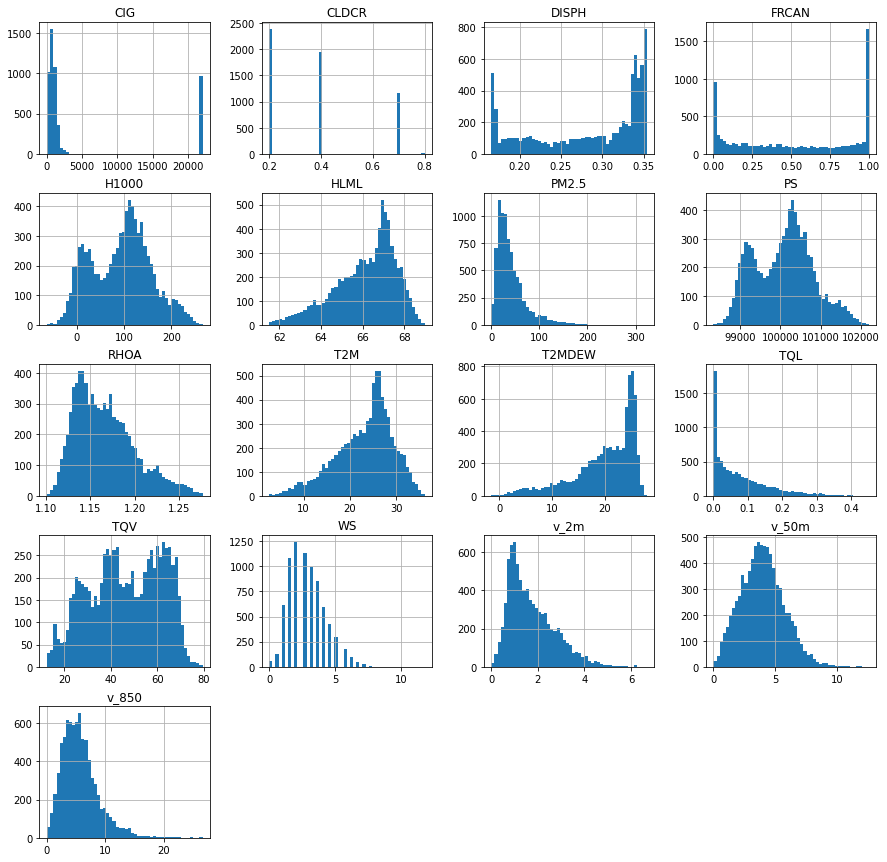

In [6]:
df.hist(bins=50, figsize=(15,15));

# Data Wrangle

## Split data train, test

In [6]:
# the idea is the split the dataset into two parts, one for training, and one for validation
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
# now we can split them with a ratio like this
train_set, test_set = split_train_test(df, 0.2)

In [8]:
len(train_set)

6493

In [9]:
len(test_set)

1623

In [11]:
# however, the sklearn library has such unility 
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=2020)
print(len(train_set))
train_set.head()

6492


,PM2.5,T2MDEW,T2M,PS,TQV,TQL,H1000,DISPH,FRCAN,HLML,RHOA,CIG,WS,CLDCR,v_2m,v_50m,v_850
DATE,,,,,,,,,,,,,,,,,
2018-11-01 01:00:00,66.0,13.76476,15.91640,100623.33,23.115633,0.000000,140.67795,0.346069,0.000000,65.119470,1.190721,NaN,2.1,NaN,1.317137,5.151577,13.778793
2018-03-11 13:00:00,97.1,16.36712,23.94467,100729.96,37.070614,0.095612,151.08076,0.170471,0.558838,65.698654,1.181534,NaN,2.1,0.4,3.250031,4.604924,5.120155
2018-11-02 17:00:00,28.0,15.21340,22.42794,100487.85,20.839620,0.000000,130.45107,0.345093,0.000000,66.063030,1.172179,NaN,1.0,NaN,0.614779,1.535728,3.374469
2018-03-27 23:00:00,63.7,18.28860,18.51727,100447.27,38.934628,0.004002,126.26744,0.192688,0.044815,65.261230,1.186127,22000.0,3.1,NaN,1.117351,4.444736,6.082646
2018-12-01 04:00:00,55.0,20.01226,20.44995,100557.99,42.091070,0.090057,136.40723,0.316406,0.208740,65.746920,1.178689,792.0,1.5,0.4,0.629109,1.737746,5.265891


## Fill NaN values
- Data are likey assembled with missing values
- Regression or machine learning works better with completed dataset

In [14]:
# make a copy and test out
df1 = df.copy(deep=True)

In [15]:
# calculate the median of the Windspeed (WS) input
median = df1['WS'].median()

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8116 entries, 2018-01-01 01:00:00 to 2018-12-31 00:00:00
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   8116 non-null   float64
 1   T2MDEW  8116 non-null   float64
 2   T2M     8116 non-null   float64
 3   PS      8116 non-null   float64
 4   TQV     8116 non-null   float64
 5   TQL     8116 non-null   float64
 6   H1000   8116 non-null   float64
 7   DISPH   8116 non-null   float64
 8   FRCAN   8092 non-null   float64
 9   HLML    8092 non-null   float64
 10  RHOA    8092 non-null   float64
 11  CIG     5088 non-null   float64
 12  WS      7809 non-null   float64
 13  CLDCR   5502 non-null   float64
 14  v_2m    8116 non-null   float64
 15  v_50m   8116 non-null   float64
 16  v_850   8116 non-null   float64
dtypes: float64(17)
memory usage: 1.1 MB


In [20]:
df1['WS'].fillna(median, inplace=True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8116 entries, 2018-01-01 01:00:00 to 2018-12-31 00:00:00
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   8116 non-null   float64
 1   T2MDEW  8116 non-null   float64
 2   T2M     8116 non-null   float64
 3   PS      8116 non-null   float64
 4   TQV     8116 non-null   float64
 5   TQL     8116 non-null   float64
 6   H1000   8116 non-null   float64
 7   DISPH   8116 non-null   float64
 8   FRCAN   8092 non-null   float64
 9   HLML    8092 non-null   float64
 10  RHOA    8092 non-null   float64
 11  CIG     5088 non-null   float64
 12  WS      8116 non-null   float64
 13  CLDCR   5502 non-null   float64
 14  v_2m    8116 non-null   float64
 15  v_50m   8116 non-null   float64
 16  v_850   8116 non-null   float64
dtypes: float64(17)
memory usage: 1.1 MB


In [22]:
# we can manually do this by for loop
for col in df1.columns:
    df1[col].fillna(df1[col].median(), inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8116 entries, 2018-01-01 01:00:00 to 2018-12-31 00:00:00
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   8116 non-null   float64
 1   T2MDEW  8116 non-null   float64
 2   T2M     8116 non-null   float64
 3   PS      8116 non-null   float64
 4   TQV     8116 non-null   float64
 5   TQL     8116 non-null   float64
 6   H1000   8116 non-null   float64
 7   DISPH   8116 non-null   float64
 8   FRCAN   8116 non-null   float64
 9   HLML    8116 non-null   float64
 10  RHOA    8116 non-null   float64
 11  CIG     8116 non-null   float64
 12  WS      8116 non-null   float64
 13  CLDCR   8116 non-null   float64
 14  v_2m    8116 non-null   float64
 15  v_50m   8116 non-null   float64
 16  v_850   8116 non-null   float64
dtypes: float64(17)
memory usage: 1.1 MB


In [23]:
# and sklearn has the Class to do such 
from sklearn.impute import SimpleImputer

In [24]:
inputer = SimpleImputer(strategy='median')

In [25]:
df2 =df.copy(deep=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8116 entries, 2018-01-01 01:00:00 to 2018-12-31 00:00:00
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   8116 non-null   float64
 1   T2MDEW  8116 non-null   float64
 2   T2M     8116 non-null   float64
 3   PS      8116 non-null   float64
 4   TQV     8116 non-null   float64
 5   TQL     8116 non-null   float64
 6   H1000   8116 non-null   float64
 7   DISPH   8116 non-null   float64
 8   FRCAN   8092 non-null   float64
 9   HLML    8092 non-null   float64
 10  RHOA    8092 non-null   float64
 11  CIG     5088 non-null   float64
 12  WS      7809 non-null   float64
 13  CLDCR   5502 non-null   float64
 14  v_2m    8116 non-null   float64
 15  v_50m   8116 non-null   float64
 16  v_850   8116 non-null   float64
dtypes: float64(17)
memory usage: 1.1 MB


In [26]:
# evaluate df2 
inputer.fit(df2)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [27]:
# see the statistic, median in this case
inputer.statistics_

array([3.20000000e+01, 2.17670550e+01, 2.45143500e+01, 1.00156612e+05,
       4.69396705e+01, 5.37109380e-02, 1.01305442e+02, 3.08166505e-01,
       5.11840850e-01, 6.64740250e+01, 1.16165940e+00, 9.45000000e+02,
       2.60000000e+00, 4.00000000e-01, 1.48621393e+00, 3.92495231e+00,
       5.23608490e+00])

In [28]:
# transform is doing the work
df2full = inputer.transform(df1)

In [29]:
type(df2full)

numpy.ndarray

In [30]:
# convert the inputed dataset and and compared
df2 = pd.DataFrame(data=df2full, columns=df1.columns)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   8116 non-null   float64
 1   T2MDEW  8116 non-null   float64
 2   T2M     8116 non-null   float64
 3   PS      8116 non-null   float64
 4   TQV     8116 non-null   float64
 5   TQL     8116 non-null   float64
 6   H1000   8116 non-null   float64
 7   DISPH   8116 non-null   float64
 8   FRCAN   8116 non-null   float64
 9   HLML    8116 non-null   float64
 10  RHOA    8116 non-null   float64
 11  CIG     8116 non-null   float64
 12  WS      8116 non-null   float64
 13  CLDCR   8116 non-null   float64
 14  v_2m    8116 non-null   float64
 15  v_50m   8116 non-null   float64
 16  v_850   8116 non-null   float64
dtypes: float64(17)
memory usage: 1.1 MB


In [32]:
# you can save to a file with all missing values filled
df.to_csv('data/filled_PM2.5_Hanoi_2018.csv')

(0.0, 200.0)

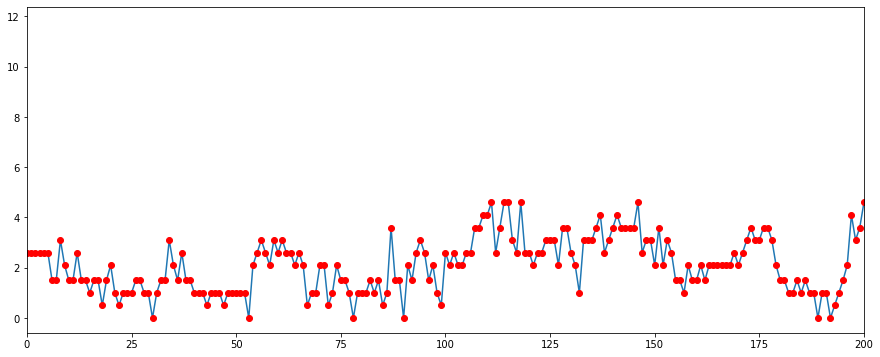

In [31]:
# let see if they are matched
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df1.WS.to_list())
ax.plot(df2.WS, 'ro')
ax.set_xlim(0,200)

## Additional cleanup

<AxesSubplot:>

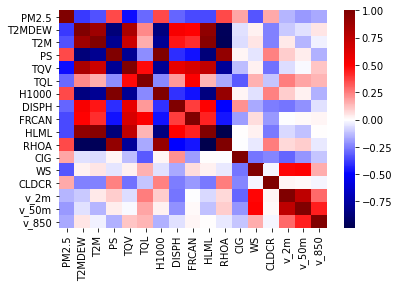

In [32]:
# let return back to the original dataset (df) before fill up NaN
sns.heatmap(df.corr(), cmap='seismic')

<AxesSubplot:>

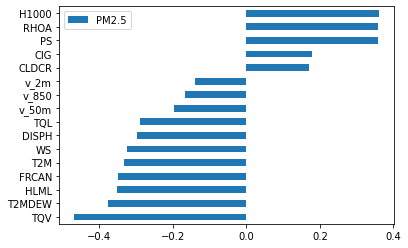

In [33]:
# and only correlation with PM2.5
df.corr()['PM2.5'].sort_values().to_frame().drop('PM2.5').plot.barh()

In [34]:
df.columns

Index(['PM2.5', 'T2MDEW', 'T2M', 'PS', 'TQV', 'TQL', 'H1000', 'DISPH', 'FRCAN',
       'HLML', 'RHOA', 'CIG', 'WS', 'CLDCR', 'v_2m', 'v_50m', 'v_850'],
      dtype='object')

In [35]:
# drop some columns either weak in correation or dependent (redundant) to other inputs
df.drop(columns=['CLDCR', 'v_2m', 'v_50m', 'v_850', 'FRCAN', 'DISPH'], inplace=True)

In [36]:
df.head()

,PM2.5,T2MDEW,T2M,PS,TQV,TQL,H1000,HLML,RHOA,CIG,WS
DATE,,,,,,,,,,,
2018-01-01 01:00:00,69.2,10.79443,13.64376,100865.09,34.909637,0.009235,160.25461,63.907425,1.216159,NaN,NaN
2018-01-01 02:00:00,75.5,10.72836,13.33932,100819.56,35.195385,0.006260,156.44829,63.832478,1.217125,NaN,NaN
2018-01-01 03:00:00,90.2,10.60630,13.09753,100793.71,35.590984,0.003489,154.54437,63.766266,1.218085,NaN,NaN
2018-01-01 04:00:00,97.6,10.50967,12.81360,100791.80,35.827934,0.002314,154.16837,63.718185,1.218972,NaN,NaN
2018-01-01 05:00:00,89.1,10.49365,12.71010,100808.45,35.953880,0.001480,155.72943,63.684280,1.219831,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8116 entries, 2018-01-01 01:00:00 to 2018-12-31 00:00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   8116 non-null   float64
 1   T2MDEW  8116 non-null   float64
 2   T2M     8116 non-null   float64
 3   PS      8116 non-null   float64
 4   TQV     8116 non-null   float64
 5   TQL     8116 non-null   float64
 6   H1000   8116 non-null   float64
 7   HLML    8116 non-null   float64
 8   RHOA    8116 non-null   float64
 9   CIG     8116 non-null   float64
 10  WS      8116 non-null   float64
dtypes: float64(11)
memory usage: 760.9 KB


## Split features (meteorological inputs) and label (PM<sub>2.5</sub>)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8116 entries, 2018-01-01 01:00:00 to 2018-12-31 00:00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   8116 non-null   float64
 1   T2MDEW  8116 non-null   float64
 2   T2M     8116 non-null   float64
 3   PS      8116 non-null   float64
 4   TQV     8116 non-null   float64
 5   TQL     8116 non-null   float64
 6   H1000   8116 non-null   float64
 7   HLML    8092 non-null   float64
 8   RHOA    8092 non-null   float64
 9   CIG     5088 non-null   float64
 10  WS      7809 non-null   float64
dtypes: float64(11)
memory usage: 760.9 KB


In [41]:
# let make X as the matrix for the feature (or inputs)
X = df.drop('PM2.5', axis=1)

In [37]:
# and lowercase y as the label (or the value of the target)
y = df['PM2.5'].copy()

In [53]:
# let build the inpute instance to work with whole data at one
# to inpute more than one columns, we can use this 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [58]:
# transform data from real value to a relative to the set
from sklearn.preprocessing import StandardScaler

In [54]:
# we have all column with numeric values
num_attrs = list(df.columns)
num_attrs.remove('PM2.5')
num_attrs

['T2MDEW', 'T2M', 'PS', 'TQV', 'TQL', 'H1000', 'HLML', 'RHOA', 'CIG', 'WS']

In [56]:
# first is the trategy for inputer using median
# then convert the absolute value in the each column using the Standard Class
num_pipeline = Pipeline([
        ('inputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
        ])

In [57]:
# and instance to tranform all column at one
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs)
])

In [60]:
# or building a function to do all in one step
def inpute_transfrom(data=None):
    num_pipeline = Pipeline([
        ('inputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
        ])
    num_attrs = list(data.columns)
    full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attrs)
        ])
    return full_pipeline.fit_transform(data) # return a numpy array

In [61]:
X_scaled = inpute_transfrom(data=X)

In [66]:
# how do we know that the data has been fixed properly
X_scaled_test = inpute_transfrom(data=X)
dft = pd.DataFrame(data=X_scaled_test, columns=num_attrs)
dft.info()
# looking good
del dft

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T2MDEW  8116 non-null   float64
 1   T2M     8116 non-null   float64
 2   PS      8116 non-null   float64
 3   TQV     8116 non-null   float64
 4   TQL     8116 non-null   float64
 5   H1000   8116 non-null   float64
 6   HLML    8116 non-null   float64
 7   RHOA    8116 non-null   float64
 8   CIG     8116 non-null   float64
 9   WS      8116 non-null   float64
dtypes: float64(10)
memory usage: 634.2 KB


In [67]:
# now we can split data, the test_size is the portion of data use for validation
# random_state is to provide consistent if you want to replicate the result
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.33, random_state=2020)

In [68]:
len(X_train), len(X_test)

(5437, 2679)

# Linear Regression

In [43]:
# Linear regression is the simplest form of data learning, let try this first
from sklearn.linear_model import LinearRegression

In [45]:
# make an instant of the class
lin_reg = LinearRegression()

In [69]:
# and training the model using the _train dataset
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [71]:
# let see the output of the mode
lin_reg.coef_

array([  -3.15806877,    9.23068653, -237.20129647,  -11.37237178,
         -1.51486159,  216.26310513,   19.10913327,   47.2122002 ,
          2.99459991,   -8.55437448])

In [72]:
# predict based on the training set
y_train_prd = lin_reg.predict(X_train)

(0.0, 500.0)

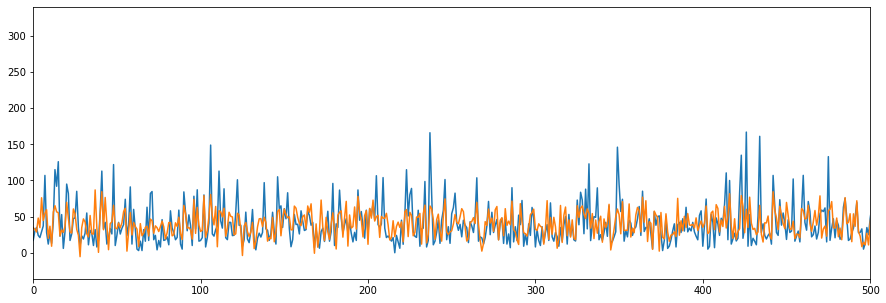

In [73]:
# let see how the label (y_train), and predicting of the label (y_prd)
plt.figure(figsize=(15,5))
plt.plot(y_train.to_list())
plt.plot(y_train_prd)
plt.xlim(0,500)

In [74]:
# more important, how about with validation set (test set)
y_test_prd = lin_reg.predict(X_test)

(0.0, 500.0)

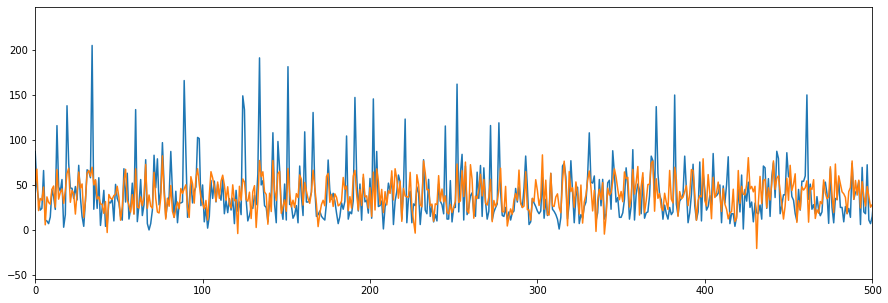

In [75]:
plt.figure(figsize=(15,5))
plt.plot(y_test.to_list())
plt.plot(y_test_prd)
plt.xlim(0,500)

- kind of there, but not easy to assess

## evaluate model performance

In [76]:
# for numeric data, one simple way to to see how far 
# between the prediction and the garget
from sklearn.metrics import mean_squared_error

In [77]:
# on training set
lin_train_mse = mean_squared_error(y_train, y_train_prd)
print('Trainset: Root Squared Mean Error', np.sqrt(lin_train_mse))

Trainset: Root Squared Mean Error 25.50502509220003


In [78]:
# on test set
lin_test_mse = mean_squared_error(y_test, y_test_prd)
print('Test set: Root Squared Mean Error', np.sqrt(lin_test_mse))

Test set: Root Squared Mean Error 25.924922211091516


In [79]:
# the average value label set (y set)
y.mean()

40.75873583045832

In [80]:
# relative error
print(f'Relative Error: {100*np.sqrt(lin_test_mse)/y.mean():.0f}%')

Relative Error: 64%


- underfitting (data), we have can predict the PM<sub>2.5</sub> concentration, but bear in mind the value can be off 64% (up and down), and that only works 66 out of 100 chances (given the error is random)
- let try another model, also, make a dictionary to keep the score between model

In [95]:
results = dict()
def add_stats(model=None, train_rmse=None, test_rmse=None):
    global results
    results[model] = {'train_rmse': round(train_rmse,1),
                     'test_rmse': round(test_rmse, 1)}
    return None

In [97]:
add_stats(model='linear reg', 
         train_rmse=np.sqrt(lin_train_mse), 
         test_rmse=np.sqrt(lin_test_mse))
results

{'linear reg': {'train_rmse': 25.5, 'test_rmse': 25.9}}

# DecisionTree

In [98]:
# let try the same approach with decision tree
from sklearn.tree import DecisionTreeRegressor

In [99]:
tree_reg = DecisionTreeRegressor()

In [100]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [101]:
tree_reg.feature_importances_

array([0.28720845, 0.06360633, 0.05308155, 0.14258232, 0.10199783,
       0.06372484, 0.05821381, 0.04296177, 0.07141657, 0.11520652])

In [102]:
tree_ytrain_d = tree_reg.predict(X_train)

In [104]:
# no error, too good!
tree_train_rmse = np.sqrt(mean_squared_error(y_train, tree_ytrain_d))
tree_train_rmse

0.0

In [105]:
tree_ytest_d = tree_reg.predict(X_test)

In [110]:
tree_test_rmse = np.sqrt(mean_squared_error(y_test, tree_ytest_d))
tree_test_rmse # higher than regression, 

28.866692614774283

In [111]:
# let bag the result
add_stats(model='decisiontree reg',
         train_rmse=tree_train_rmse,
         test_rmse=tree_test_rmse)
results

{'linear reg': {'train_rmse': 25.5, 'test_rmse': 25.9},
 'decisiontree reg': {'train_rmse': 0.0, 'test_rmse': 28.9}}

In [107]:
# the results by train set and test set are rather different, to see it
def plot_prediction(label=None, prediction=None, limit=200):
    plt.figure(figsize=(14,6))
    plt.plot(label.to_list())
    plt.plot(prediction, 'ro')
    plt.xlim(0, limit)
    return None

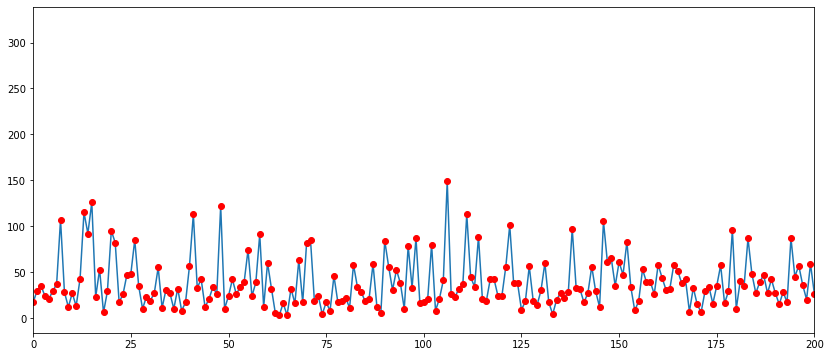

In [108]:
plot_prediction(y_train, tree_ytrain_d)

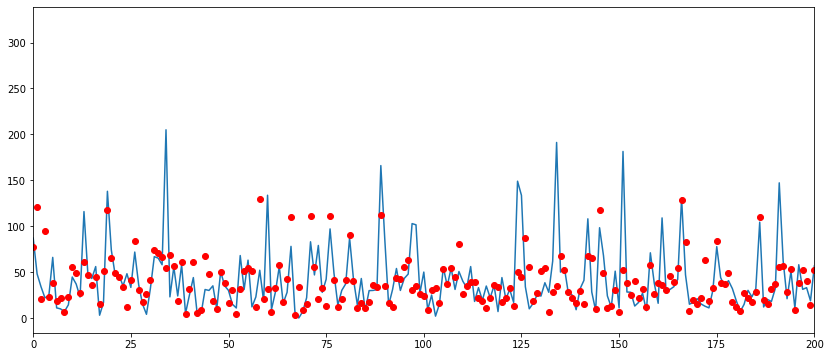

In [109]:
plot_prediction(y_test, tree_ytest_d)

- overfitting data for training set (memorization), and underfitting with test set (not map key feature)

## RandomForest

In [112]:
# more powerful model
from sklearn.ensemble import RandomForestRegressor

In [113]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [114]:
forest_ytrain_p = forest_reg.predict(X_train)

In [116]:
mse_train = mean_squared_error(y_train, forest_ytrain_p)
rmse_train = np.sqrt(mse_train)
rmse_train

7.319539455569634

In [117]:
# test set
forest_ytest_p = forest_reg.predict(X_test)

In [119]:
mse_test = mean_squared_error(y_test, forest_ytest_p)
rmse_test = np.sqrt(mse_test)
rmse_test

19.94340670771594

In [131]:
add_stats(model='randomforest reg',
         train_rmse=rmse_train,
         test_rmse=rmse_test)
results

{'linear reg': {'train_rmse': 25.5, 'test_rmse': 25.9},
 'decisiontree reg': {'train_rmse': 0.0, 'test_rmse': 28.9},
 'randomforest reg': {'train_rmse': 7.3, 'test_rmse': 19.9}}

## Cross validation

In [122]:
from sklearn.model_selection import cross_val_score

In [124]:
scores = cross_val_score(tree_reg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)

In [125]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([25.0286516 , 27.29367756, 25.45272398, 28.72647087, 27.21742825,
       27.55288765, 25.1130188 , 31.19758898, 27.76135077, 28.17651903])

In [126]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [127]:
display_scores(scores)

Scores:  [-626.43340074 -744.94483456 -647.84115809 -825.21012868 -740.78840074
 -759.16161765 -630.66371324 -973.28955801 -770.69259669 -793.91622468]
Mean:  -751.2941633050319
Standard Deviation:  98.99266952818422


In [128]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, 
                             scoring='neg_mean_squared_error', cv=10)

In [129]:
display_scores(lin_scores)

Scores:  [-550.85870613 -723.57425609 -604.74504505 -774.75436464 -558.6424609
 -650.90144343 -694.9417229  -791.12250196 -464.54518714 -719.45029524]
Mean:  -653.3535983471008
Standard Deviation:  101.11405749157925


In [130]:
forest_scores = cross_val_score(forest_reg, X_train, y_train, 
                                scoring='neg_mean_squared_error', cv=10)

In [132]:
display_scores(forest_scores)

Scores:  [-336.85249494 -414.55027717 -340.52606942 -495.02698419 -328.95593693
 -347.62383281 -410.42979521 -546.46635029 -250.81217664 -405.05053205]
Mean:  -387.6294449641497
Standard Deviation:  81.77438259082012


In [133]:
# how about on test set:
for model in [lin_reg, tree_reg, forest_reg]:
    scores = cross_val_score(model, X_test, y_test, 
                             scoring='neg_mean_squared_error', cv=10)
    display_scores(scores)
    print('-'*40)
    

Scores:  [-771.63467574 -554.4382247  -813.16490696 -717.49508355 -598.56766015
 -632.13746509 -569.73439949 -753.33939901 -661.54505262 -680.24197289]
Mean:  -675.229884018897
Standard Deviation:  83.5905310705698
----------------------------------------
Scores:  [-1259.97597015  -782.79813433 -1032.93242537 -1106.06947761
  -696.41026119  -846.71276119  -801.66145522  -820.10895522
  -866.49783582  -906.43479401]
Mean:  -911.9602070126894
Standard Deviation:  162.3358653447053
----------------------------------------
Scores:  [-602.63798754 -381.18848133 -554.00563056 -519.45501511 -321.74875161
 -450.15756396 -336.19587503 -490.46458475 -539.81659685 -420.10498245]
Mean:  -461.57754692068863
Standard Deviation:  90.73701388730139
----------------------------------------


- look like the RandomForest Regression performs a bit better than the first two

## save model

In [135]:
# just in case you want to save your work
from sklearn.externals import joblib

In [134]:
# import os
# os.makedirs('model')

In [135]:
joblib.dump(forest_reg, 'model/forest_reg.pkl' )

['model/forest_reg.pkl']

## Grid Search

In [136]:
# we want to model performs better, in this case we tune the hyperparameters
from sklearn.model_selection import GridSearchCV

In [137]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

In [138]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                          return_train_score=True)

In [139]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [140]:
# and see the best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [141]:
# or best parameters
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [142]:
# or see the how each combination has worked
cvres = grid_search.cv_results_

In [144]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(round(np.sqrt(-mean_score),2), params)

24.44 {'max_features': 2, 'n_estimators': 3}
21.28 {'max_features': 2, 'n_estimators': 10}
20.33 {'max_features': 2, 'n_estimators': 30}
23.87 {'max_features': 4, 'n_estimators': 3}
21.03 {'max_features': 4, 'n_estimators': 10}
19.98 {'max_features': 4, 'n_estimators': 30}
23.36 {'max_features': 6, 'n_estimators': 3}
20.92 {'max_features': 6, 'n_estimators': 10}
20.0 {'max_features': 6, 'n_estimators': 30}
23.39 {'max_features': 8, 'n_estimators': 3}
21.0 {'max_features': 8, 'n_estimators': 10}
20.19 {'max_features': 8, 'n_estimators': 30}
23.2 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
20.45 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
22.49 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
20.33 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
22.55 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
20.51 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


- so the best case with Random Forecast is 19.98 (&mu;g/m<sup>3</sup>) as the standard deviation

## Analyze model

In [145]:
# could look back to see how the weight of each input
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.16949425, 0.06773473, 0.09429158, 0.1824907 , 0.09555117,
       0.06977307, 0.0676954 , 0.07244233, 0.07794705, 0.10257973])

In [147]:
sorted(zip(feature_importances, X.columns), reverse=True)

[(0.18249070117732566, 'TQV'),
 (0.16949424694791368, 'T2MDEW'),
 (0.10257973245798097, 'WS'),
 (0.09555117432888298, 'TQL'),
 (0.09429157739434971, 'PS'),
 (0.07794704937895328, 'CIG'),
 (0.07244232993501565, 'RHOA'),
 (0.06977306516481928, 'H1000'),
 (0.0677347267676391, 'T2M'),
 (0.06769539644711989, 'HLML')]

- so the total liquid volumn and dewpoint influences PM<sub>2.5</sub> more than the air temperature or surface level height

In [152]:
# let see how grid search performs
# train set
grid_ytrain_p = grid_search.predict(X_train)
grid_mse = mean_squared_error(y_train, grid_ytrain_p)
grid_train_rmse = np.sqrt(grid_mse)
grid_train_rmse

7.795150104149395

In [153]:
# let see how the prediction look like after hypertunning
# test set
grid_ytest_p = grid_search.predict(X_test)
grid_test_mse = mean_squared_error(y_test, grid_ytest_p)
grid_test_rmse = np.sqrt(grid_test_mse)
grid_test_rmse

20.033245999333058

In [154]:
# still more to work with, but let bag the result for later comparison
add_stats(model='gridsearch',
         train_rmse=grid_train_rmse,
         test_rmse=grid_test_rmse)
results

{'linear reg': {'train_rmse': 25.5, 'test_rmse': 25.9},
 'decisiontree reg': {'train_rmse': 0.0, 'test_rmse': 28.9},
 'randomforest reg': {'train_rmse': 7.3, 'test_rmse': 19.9},
 'gridsearch': {'train_rmse': 7.8, 'test_rmse': 20.0}}

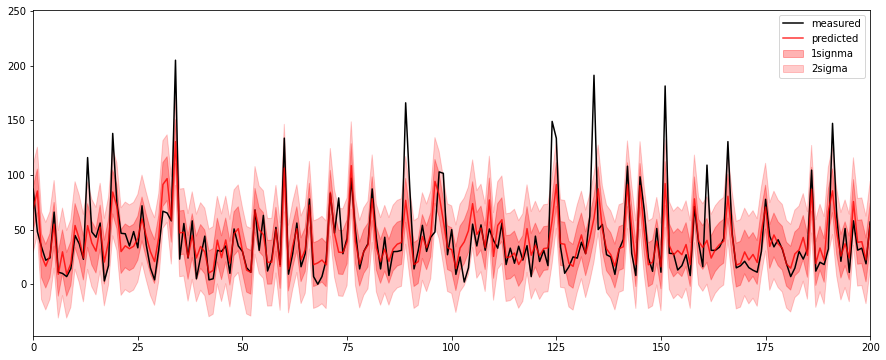

In [157]:
# let visualize it
std_ = grid_test_rmse
xindex = np.arange(0, len(y_test))
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(y_test.to_list(), color='black', label='measured')
ax.plot(grid_ytest_p, color='red', alpha=0.8, label='predicted')
ax.fill_between(xindex, grid_ytest_p-std_,grid_ytest_p+std_, 
                color='red', alpha=0.3, label='1signma' )
ax.fill_between(xindex, grid_ytest_p-2*std_,grid_ytest_p+2*std_, 
                color='red', alpha=0.2, label = '2sigma')
ax.set_xlim(0,200)
ax.legend()

- an easy way to make sure the prediction range captures the real value is to increase the band, and so enlarge the uncertainty
- but let see how confidence we have on the RSME, 

## Scipy interval 95%

In [158]:
# let use stats from scipy library
from scipy import stats

In [161]:
# and look confidence of .95, or the area that a value will be inside the range with 95 chances of 100
confidence = 0.95

In [162]:
squared_errors = (grid_ytest_p - y_test)**2

In [163]:
np.sqrt(stats.t.interval(
    confidence, 
    len(squared_errors)-1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)))

array([18.83035947, 21.1678873 ])

- so we are pretty sure that standard deviation from grid search is from 18.8 to 21.1 
- how confidience: 95 chances out of 100, this RMSE will be within this range

## Ensemble Methods

In [164]:
# let look at a final approach to combine three regression we have so far using Voting method
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

In [165]:
from sklearn.tree import DecisionTreeRegressor

In [166]:
# re-define an instance, all training in the previous sessions are gone
lin_reg  = LinearRegression()
tree_reg = DecisionTreeRegressor()
rnd_reg = RandomForestRegressor()

In [167]:
# and make each model as an parameter for then ensemble (voting)
voting_reg = VotingRegressor(
    estimators=[('lin', lin_reg),
               ('rnd', rnd_reg),
               ('tree', tree_reg)
               ],
)

In [168]:
# train model by the train set
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lin',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('rnd',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_sp

In [169]:
# check estimator (paramters)
voting_reg.estimators_

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')]

In [170]:
# now we do predicting on the test set
y_entest_p = voting_reg.predict(X_test)

In [171]:
mse = mean_squared_error(y_entest_p, y_test)
en_test = np.sqrt(mse)

In [172]:
# we could run on train set
y_entrain_p = voting_reg.predict(X_train)
mse = mean_squared_error(y_entrain_p, y_train)
en_train = np.sqrt(mse)

In [173]:
en_test, en_train

(21.89413644598667, 10.545304085343597)

In [174]:
# still in 21 for test set
add_stats(model='voting reg',
         train_rmse=en_train,
         test_rmse=en_test)
results

{'linear reg': {'train_rmse': 25.5, 'test_rmse': 25.9},
 'decisiontree reg': {'train_rmse': 0.0, 'test_rmse': 28.9},
 'randomforest reg': {'train_rmse': 7.3, 'test_rmse': 19.9},
 'gridsearch': {'train_rmse': 7.8, 'test_rmse': 20.0},
 'voting reg': {'train_rmse': 10.5, 'test_rmse': 21.9}}

(200.0, 300.0)

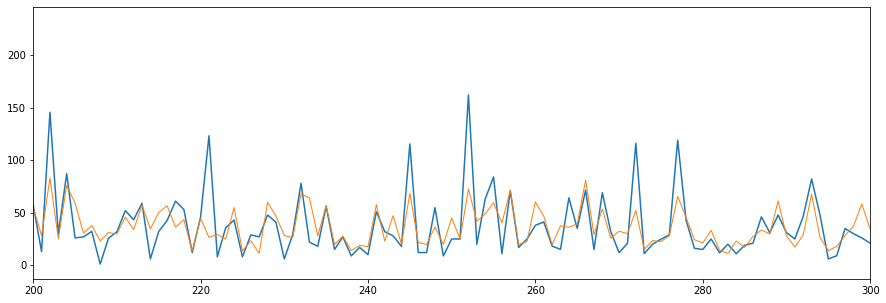

In [175]:
# let visualize the data from Ensemble with test set
plt.figure(figsize=(15,5))
plt.plot(y_test.to_list())
plt.plot(y_entest_p, lw=1)
plt.xlim(200,300)

- so we can get a RMSE = 20 from several model, which is about 50% as the relative standard deviation
- this dataset is combined from several source, but not easy to get from a forecast product (in fact, I am struggling to get those), so we will try out a dataset with lessure feasture, 

# DarkSky Dataset
- you can check out this API at DarkSky.net

## Merge data

In [176]:
# laod data in
dk = pd.read_csv('data/darksky_hanoi_2018.csv', parse_dates=['time'], index_col=['time'])

In [177]:
dk.columns

Index(['apparenttemperature', 'cloudcover', 'dewpoint', 'humidity', 'icon',
       'ozone', 'precipintensity', 'precipprobability', 'preciptype',
       'pressure', 'summary', 'temperature', 'uvindex', 'visibility',
       'windbearing', 'windgust', 'windspeed'],
      dtype='object')

In [178]:
# select few important columsn
cols = ['temperature', 'dewpoint', 'humidity', 'pressure', 'precipintensity','cloudcover', 'visibility', 'windspeed']

In [179]:
dkt = dk[cols]

In [180]:
# load PM2.5 data
pm = pd.read_csv('data/cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv',
                parse_dates=['Date (LT)'],
                index_col=['Date (LT)'])

In [181]:
pm.head()

,pm25
Date (LT),
2018-01-01 01:00:00,69.2
2018-01-01 02:00:00,75.5
2018-01-01 03:00:00,90.2
2018-01-01 04:00:00,97.6
2018-01-01 05:00:00,89.1


In [182]:
# check duplicated data if you want, wait, this is too much
dkt.duplicated().sum()

1783

In [183]:
dkt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8745 entries, 2017-12-31 00:00:00 to 2019-01-01 00:00:00
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      8742 non-null   float64
 1   dewpoint         8742 non-null   float64
 2   humidity         8742 non-null   float64
 3   pressure         1137 non-null   float64
 4   precipintensity  3383 non-null   float64
 5   cloudcover       6862 non-null   float64
 6   visibility       8711 non-null   float64
 7   windspeed        8600 non-null   float64
dtypes: float64(8)
memory usage: 614.9 KB


In [184]:
# let sort index (datetime) first
dkt.sort_index(inplace=True)

In [185]:
# and see duplicated row
dkt.loc[dkt.duplicated()].head(6)

,temperature,dewpoint,humidity,pressure,precipintensity,cloudcover,visibility,windspeed
time,,,,,,,,
2017-12-31 05:00:00,16.98,9.99,0.63,NaN,0.0,NaN,10.01,3.6
2017-12-31 06:00:00,16.98,9.99,0.63,NaN,0.0,NaN,10.01,3.6
2018-01-05 06:00:00,19.99,19.00,0.94,NaN,0.0,0.75,2.09,1.5
2018-01-05 08:00:00,19.99,19.00,0.94,NaN,0.0,0.75,1.50,1.5
2018-01-05 09:00:00,19.99,19.00,0.94,NaN,0.0,0.75,1.40,1.5
2018-01-06 23:00:00,19.99,19.00,0.94,NaN,0.0,0.75,3.51,2.6


- they are matched exact, but dropping them will need to fill in more data later, so it is okay to keep the closest values in by adjacent rows

In [186]:
# merge data
df = pd.merge(pm, dkt, right_index=True, left_index=True, how='left')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pm25             8190 non-null   float64
 1   temperature      8150 non-null   float64
 2   dewpoint         8150 non-null   float64
 3   humidity         8150 non-null   float64
 4   pressure         1079 non-null   float64
 5   precipintensity  3220 non-null   float64
 6   cloudcover       6441 non-null   float64
 7   visibility       8119 non-null   float64
 8   windspeed        8020 non-null   float64
dtypes: float64(9)
memory usage: 639.8 KB


In [188]:
# quick check correlation 
df.corr()['pm25'].sort_values()

visibility        -0.452880
temperature       -0.371182
dewpoint          -0.371018
windspeed         -0.351326
humidity          -0.082217
precipintensity    0.000103
cloudcover         0.111920
pressure           0.419824
pm25               1.000000
Name: pm25, dtype: float64

In [189]:
# seperate feature and label
X = df.drop('pm25', axis=1)
y = df['pm25'].copy()

In [190]:
X_scaled = inpute_transfrom(data=X)

In [191]:
type(X_scaled)

numpy.ndarray

## Split train and test

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.33, random_state=2020)

In [202]:
len(X_train), len(y_train)

(5487, 5487)

In [204]:
len(X_test), len(X_test)

(2703, 2703)

## Train and validate

In [205]:
# I will jump in and use voting (seem safer)
lin_reg  = LinearRegression()
tree_reg = DecisionTreeRegressor()
rnd_reg = RandomForestRegressor()
voting_reg = VotingRegressor(
    estimators=[('lin', lin_reg),
               ('rnd', rnd_reg),
               ('tree', tree_reg)
               ],
)

In [206]:
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lin',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('rnd',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_sp

In [207]:
voting_reg.estimators_

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')]

### Trainset

In [208]:
y_entrain_p = voting_reg.predict(X_train)

In [209]:
mse = mean_squared_error(y_entrain_p, y_train)
train_std = np.sqrt(mse)
train_std

11.653075002954594

In [280]:
y_train.iloc[0:100]

2018-05-17 08:00:00    20.0
2018-09-05 03:00:00    33.0
2018-12-31 10:00:00    22.0
2018-07-06 19:00:00    20.0
2018-01-05 11:00:00    88.1
                       ... 
2018-09-19 20:00:00    34.0
2018-11-15 02:00:00    20.0
2018-09-25 09:00:00    19.0
2018-09-07 05:00:00    11.0
2018-08-20 21:00:00    36.0
Name: pm25, Length: 100, dtype: float64

In [211]:
from random import randint

In [212]:
# time to invest some good graphs
def plot_results(label=None, prediction=None, std_=None, points=100, savefig=False):
    plt.style.use('default')
    plt.rcParams['font.size'] = 12
    start = randint(0, len(label)-points)
    end = start + points
    label_ = label.iloc[start:end]
    pred_ = prediction[start:end]
    xindex = np.arange(0,len(label_),1)
    
    plt.figure(figsize=(10,6))
    plt.plot(label_.to_list(), 'ko--',lw=0.5, label='measured')
    plt.plot(pred_, lw=1, color='#922B21', label='predicted')
    plt.fill_between(xindex, pred_- std_, pred_+std_,
                    color='#5499C7', alpha=0.6, label = '$\pm1 \sigma$')
    
    max_ = np.max([label_.max(), np.max(pred_)]) 
    plt.ylim(0, 1.1*max_)
    plt.ylabel('Concentration, $\mu g/m^3$')
    plt.title('Measured and predicted $PM_{2.5}$ using Ensemble regression', 
              y=1.05, weight='bold')
    plt.xlabel('Hour, site: Hanoi, 2018')
    plt.legend(ncol=3)
    if savefig:
        plt.tight_layout()
        plt.savefig(f'img/en_reg_{start}.png', optimize=True)
    return None

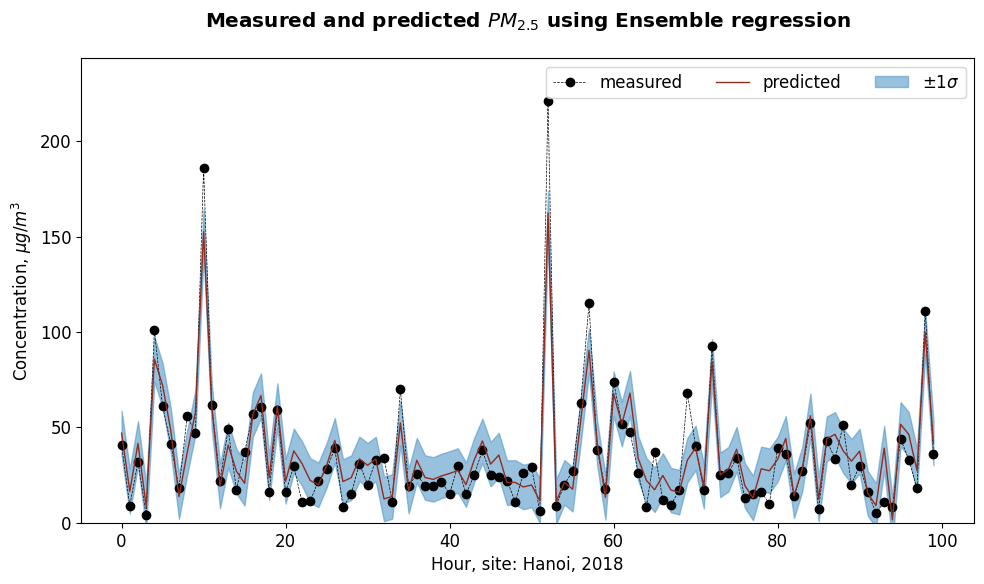

In [213]:
plot_results(label=y_train, prediction=y_entrain_p,
             std_=train_std, savefig=True)

### Testset

In [214]:
y_entest_p = voting_reg.predict(X_test)

In [215]:
mse = mean_squared_error(y_entest_p, y_test)
test_std = np.sqrt(mse)
mse, test_std

(469.53197116134754, 21.668686419839748)

In [216]:
add_stats(model='voting reg (Darksky)',
         train_rmse=train_std,
         test_rmse=test_std)
results

{'linear reg': {'train_rmse': 25.5, 'test_rmse': 25.9},
 'decisiontree reg': {'train_rmse': 0.0, 'test_rmse': 28.9},
 'randomforest reg': {'train_rmse': 7.3, 'test_rmse': 19.9},
 'gridsearch': {'train_rmse': 7.8, 'test_rmse': 20.0},
 'voting reg': {'train_rmse': 10.5, 'test_rmse': 21.9},
 'voting reg (Darksky)': {'train_rmse': 11.7, 'test_rmse': 21.7}}

- not much worse, infact, with less parameters and get a similar outcome, that is actually encouraging

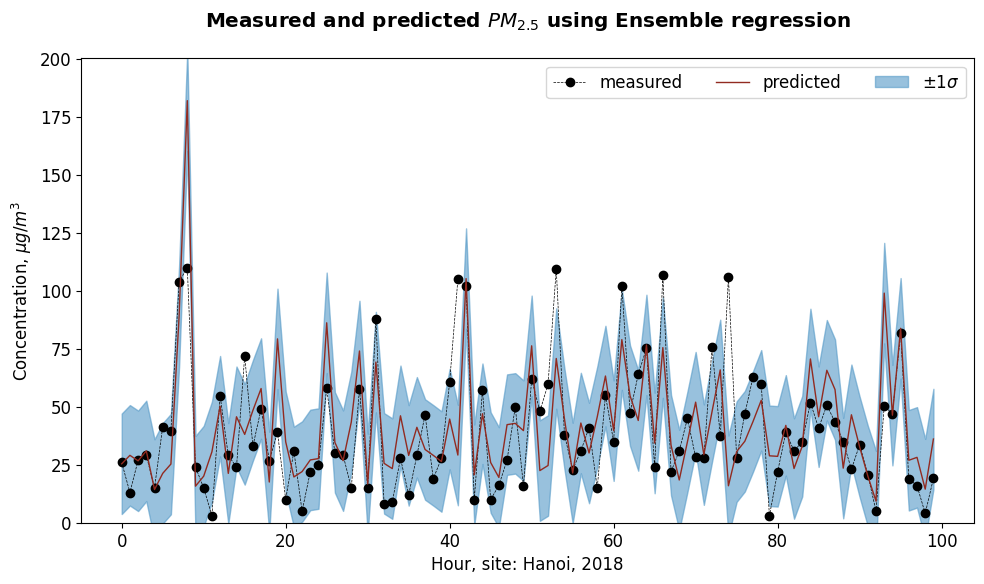

In [217]:
plot_results(label=y_test, 
             prediction=y_entest_p, std_=test_std, savefig=True)

# RMSE

In [218]:
df = pd.DataFrame(data=results)

In [219]:
df

,linear reg,decisiontree reg,randomforest reg,gridsearch,voting reg,voting reg (Darksky)
train_rmse,25.5,0.0,7.3,7.8,10.5,11.7
test_rmse,25.9,28.9,19.9,20.0,21.9,21.7


In [222]:
df2 = df.transpose()

In [223]:
df2

,train_rmse,test_rmse
linear reg,25.5,25.9
decisiontree reg,0.0,28.9
randomforest reg,7.3,19.9
gridsearch,7.8,20.0
voting reg,10.5,21.9
voting reg (Darksky),11.7,21.7


In [280]:
plt.style.use('seaborn-whitegrid')

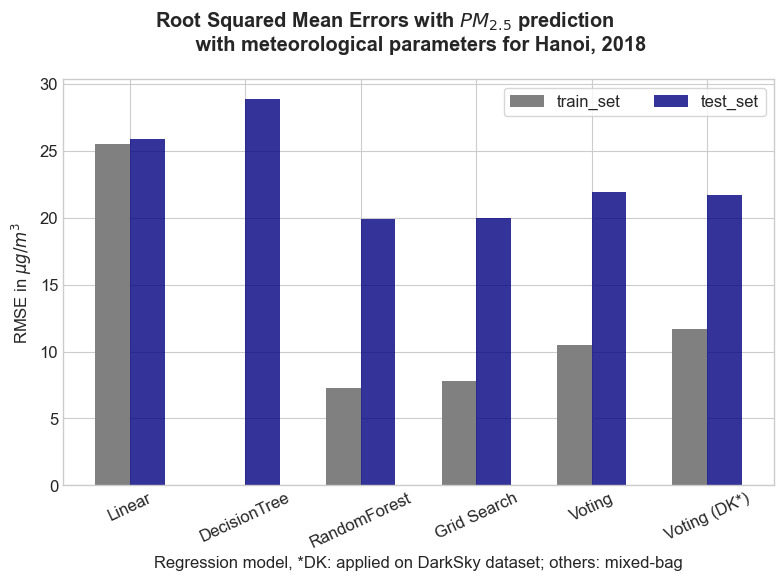

In [299]:
bw = 0.3
idx = np.arange(len(df2))
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(idx-bw/2, df2['train_rmse'], bw, color='gray', label='train_set')
ax.bar(idx+bw/2, df2['test_rmse'], bw, color='navy', alpha=0.8, label='test_set')
ax.set_xticklabels(['','Linear', 'DecisionTree', 'RandomForest', 
                    'Grid Search', 'Voting', 'Voting (DK*)'],
                  rotation=25)
ax.set_xlabel('Regression model, *DK: applied on DarkSky dataset; others: mixed-bag')
ax.set_title('Root Squared Mean Errors with $PM_{2.5}$ prediction\
             \n with meteorological parameters for Hanoi, 2018',
            y=1.05,
            weight='bold')
# labels = ax.get_xticklabels()
ax.set_ylabel('RMSE in $\mu g/m^3$')
ax.legend(frameon=True, ncol=2)
fig.tight_layout()
fig.savefig('img/2020Aug_rmse_raw.png')

In [270]:
pm['pm25'].mean()

40.75225885225883

In [273]:
df3 = df2*100/pm['pm25'].mean()

In [274]:
df3

,train_rmse,test_rmse
linear reg,62.573219,63.554759
decisiontree reg,0.000000,70.916314
randomforest reg,17.913117,48.831649
gridsearch,19.140043,49.077034
voting reg,25.765443,53.739352
voting reg (Darksky),28.710065,53.248582


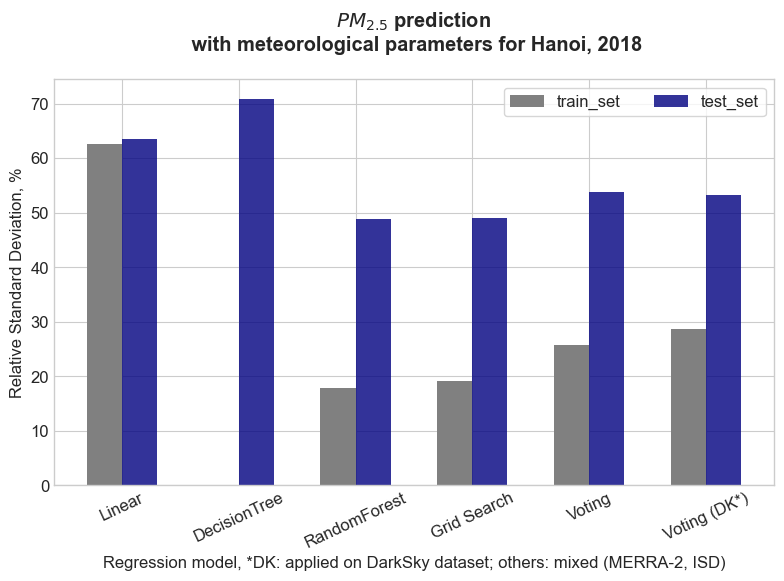

In [296]:
bw = 0.3
idx = np.arange(len(df3))
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(idx-bw/2, df3['train_rmse'], bw, color='gray', label='train_set')
ax.bar(idx+bw/2, df3['test_rmse'], bw, color='navy', alpha=0.8, label='test_set')
ax.set_xticklabels(['','Linear', 'DecisionTree', 'RandomForest',
                    'Grid Search', 'Voting', 'Voting (DK*)'],
                  rotation=25)
ax.set_xlabel('Regression model, *DK: applied on DarkSky dataset; others: mixed (MERRA-2, ISD)')
ax.set_title('$PM_{2.5}$ prediction\n with meteorological parameters for Hanoi, 2018', 
             y=1.05,
            weight='bold')
# labels = ax.get_xticklabels()
ax.set_ylabel('Relative Standard Deviation, %')
ax.legend(frameon=True, ncol=2)
fig.tight_layout()
# fig.tight_layout(rect=(0.1,0.1,0.95, 0.95))
fig.savefig('img/2020Aug_rmse_rsd.png')